# 17/10/23

### HadUK Data

                        tas               geo_region
time       region                                   
1884-07-01 1            NaN  b'Channel Islands     '
           2        9.44171  b'East Midlands       '
           3        9.72926  b'East of England     '
           4        6.93988  b'East Scotland       '
           5        8.72389  b'Isle of Man         '
...                     ...                      ...
2022-07-01 12      11.30148  b'South West England  '
           13      10.23398  b'Wales               '
           14      10.84583  b'West Midlands       '
           15       9.15501  b'West Scotland       '
           16      10.29933  b'Yorkshire and Humber'

[2224 rows x 2 columns]


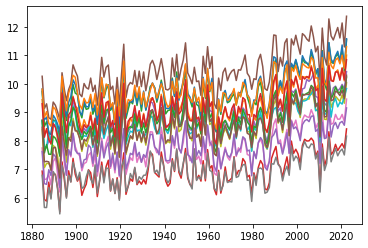

In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\tas_hadukgrid_uk_region_ann_188401-202212.nc")
# Loading the data from the .nc file into python.

#print(data.variables)

df = data[['tas','time']].to_dataframe()
# Creating a data frame out of two variables for eases of use.

print(df)
#xr.plot.scatter(data, 'time', 'tas')

time_array = np.array(data['time'])
tas_array = np.array(data['tas'])
# Converting the .nc data into numpy arrays so they can be used

#print(time_array)

plt.plot(time_array, tas_array)

Above is annual regional average teperature for 16 regions in the U.K. from 1884 to 2022. Currently plots all 16 regions individually. Need to either isolate a single region or combine all of them for a national average.

### Issues with HadUk Data

In [4]:
import xarray as xr


data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\tas_hadukgrid_uk_12km_ann-30y_196101-199012.nc")
print(data.data_vars)
# Prints all the variables listed in the .nc file

print(data['tas'])
print(data[['time','time_bnds']])
# Prints specific information on a given variable


Data variables:
    tas                           (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) datetime64[ns] ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
<xarray.DataArray 'tas' (time: 1, projection_y_coordinate: 112, projection_x_coordinate: 82)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time                     (time) datetime64[ns] 1961-07-01
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (project

As can be seen above the temperature values in the netCDF file for grid measurements are nan (not a number). Also, looking at the time, there is only a single time value in the file, with boundaries at 1961-01 and 1990-12. 

### Historical Data

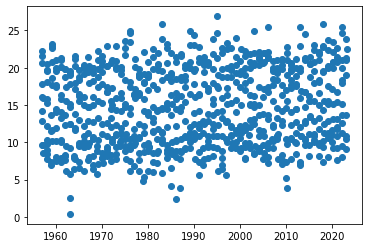

In [2]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.genfromtxt('https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/hurndata.txt', skip_header=8)

#print(data)

year,tmax = data.transpose()[0],data.transpose()[2]
month = data.transpose()[1]
year_array, tmax_array, month_array = np.array([year]), np.array([tmax]), np.array([month])



#print(tmax_array)

time = year_array + (month_array/100)
#print(time)


plt.scatter(time,tmax_array)

Relatively easy to navigate the historical data. Will only plot scatter plots, I think due to how close in proximity some of the data points are. Not an ideal workaround in trying to include the month data.